<a href="https://colab.research.google.com/github/Shalu31/30-days--30-project-in-AI/blob/main/BRAINTUMOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

IMPORTING DATA FROM DRIVE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir = '/content/drive/MyDrive/Tumour'

**brain_tumor_dataset/
    glioma/
    meningioma/
    pituitary/
    no_tumor/
**

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
ima_size = 224
batch_size = 32

**TRAIN DIRECTORY**

In [6]:
traindir = "/content/drive/MyDrive/Tumour/train"

**TEST DIRECTORY**

In [7]:
testdir = "/content/drive/MyDrive/Tumour/test"

In [8]:
CATEGORIES = ['glioma','no_tumor','meningioma','glioma']

In [9]:
img_size = 224
batch_size = 32

In [10]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [11]:
train_generator = train_datagen.flow_from_directory(
    traindir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True
)

Found 1358 images belonging to 4 classes.


**VALID DIRECTORY**

In [12]:
validdir = "/content/drive/MyDrive/Tumour/valid"

In [13]:
val_generator = train_datagen.flow_from_directory(
    validdir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation',
    shuffle = True
)

Found 98 images belonging to 4 classes.


In [14]:
print("Class mapping:")
print(train_generator.class_indices)


Class mapping:
{'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

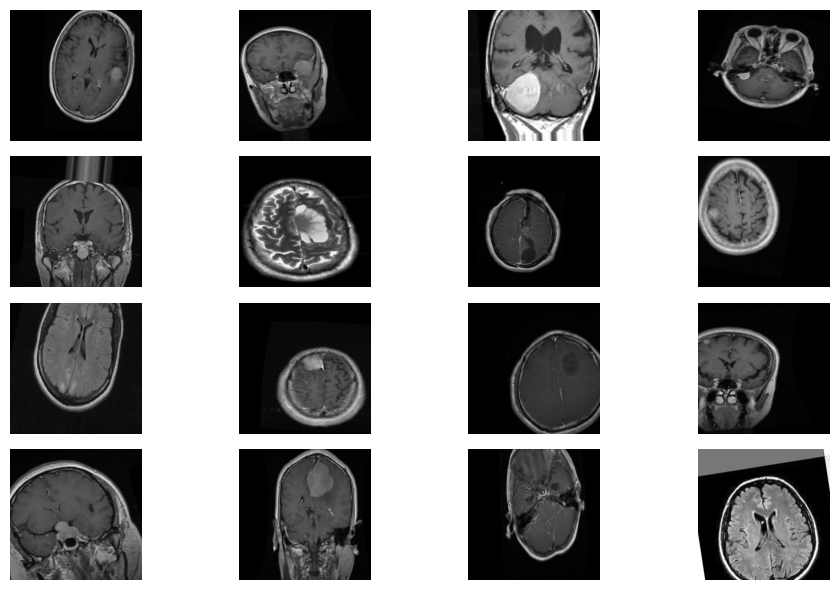

In [16]:
x,y = train_generator.__next__()
plt.figure(figsize=(10,6))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(x[i])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [26]:
model_cnn = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(224, 224, 3)),

    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), padding='same'),

    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), padding='same'),

    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 tumor classes
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,276 (430.77 KB)

 Trainable params: 110,276 (430.77 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [34]:
history = model_cnn.fit(train_generator, validation_data=val_generator,
                    epochs=10,
                    callbacks=[early_stopping])

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4159 - loss: 1.2895

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 213s 5s/step - accuracy: 0.4166 - loss: 1.2875 - val_accuracy: 0.5204 - val_loss: 1.1867
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 228s 4s/step - accuracy: 0.5148 - loss: 1.0583 - val_accuracy: 0.5000 - val_loss: 1.1422
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 206s 4s/step - accuracy: 0.5625 - loss: 1.0151 - val_accuracy: 0.5408 - val_loss: 1.1097
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.5459 - loss: 0.9961 - val_accuracy: 0.5306 - val_loss: 1.1816
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.5579 - loss: 1.0368 - val_accuracy: 0.5510 - val_loss: 1.0740
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 176s 4s/step - accuracy: 0.6309 - loss: 0.9114 - val_accuracy: 0.5612 - val_loss: 1.0212
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.6130 - loss: 0.9460 - val_accuracy: 0.5714 - val_loss: 1.0707
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - accuracy: 0.6599 - loss: 0.8747 - val_accuracy: 0.6327 - val_loss: 1.

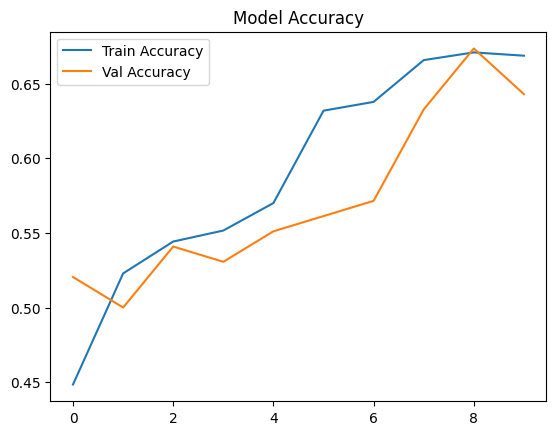

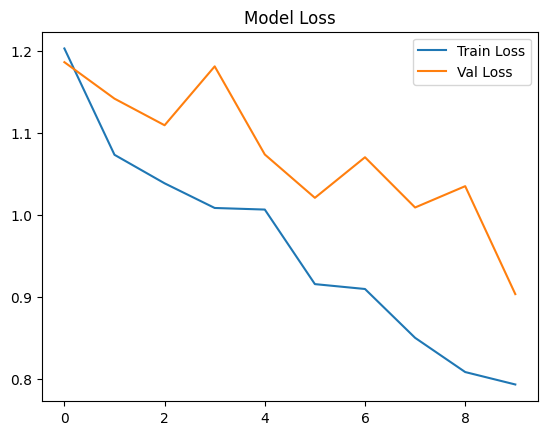

In [35]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()
